In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('ikea2.csv')
data.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,product_description,current_status,kewords,topic_group,topic_desc
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,Item discontinued,Item discontinued,NaN,NaN,NaN
1,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,Item discontinued,Item discontinued,NaN,NaN,NaN
2,50420329,FREKVENS,Bar furniture,177.0,SR 295,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,53.0,104.0,43.0,Item discontinued,Item discontinued,NaN,NaN,NaN
3,400550,EKEDALEN,Bar furniture,345.0,No old price,True,https://www.ikea.com/sa/en/p/ekedalen-bar-stoo...,No,"Bar stool with backrest, 75 cm",Ehl√©n Johansson,52.0,114.0,43.0,Item discontinued,Item discontinued,NaN,NaN,NaN
4,40426138,HENRIKSDAL,Bar furniture,395.0,No old price,True,https://www.ikea.com/sa/en/p/henriksdal-bar-st...,No,"Bar stool with backrest frame, ...",Karl Malmvall,51.0,102.0,40.0,Item discontinued,Item discontinued,NaN,NaN,NaN


In [ ]:
data.shape

(3694, 18)

In [ ]:
data.describe()

,item_id,price,depth,height,width,topic_group
count,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000,1409.000000
mean,4.863240e+07,1078.208419,54.379202,101.679970,104.470853,1.102910
std,2.888709e+07,1374.652494,29.958351,61.097585,71.133771,0.852835
min,5.848700e+04,3.000000,1.000000,1.000000,1.000000,0.000000
25%,2.039057e+07,180.900000,38.000000,67.000000,60.000000,0.000000
50%,4.928808e+07,544.700000,47.000000,83.000000,80.000000,1.000000
75%,7.040357e+07,1429.500000,60.000000,124.000000,140.000000,2.000000
max,9.993262e+07,9585.000000,257.000000,700.000000,420.000000,2.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   item_id              3694 non-null   int64  
 1   name                 3694 non-null   object 
 2   category             3694 non-null   object 
 3   price                3694 non-null   float64
 4   old_price            3694 non-null   object 
 5   sellable_online      3694 non-null   bool   
 6   link                 3694 non-null   object 
 7   other_colors         3694 non-null   object 
 8   short_description    3694 non-null   object 
 9   designer             3694 non-null   object 
 10  depth                2231 non-null   float64
 11  height               2706 non-null   float64
 12  width                3105 non-null   float64
 13  product_description  3694 non-null   object 
 14  current_status       3694 non-null   object 
 15  kewords              1394 non-null   o

In [ ]:
data.rename(columns={'kewords': 'keywords'}, inplace=True)

**Data Cleaning and Preprocessing Tasks:**

Handle Missing Values: Identify and handle missing values in columns such as depth, keywords, topic_group, and topic_desc.

In [ ]:
data.isnull().sum()

,0
item_id,0
name,0
category,0
price,0
old_price,0
sellable_online,0
link,0
other_colors,0
short_description,0
designer,0


In [ ]:
data['keywords'].value_counts()

,count
keywords,
white keep neat lets use Find suitable use humid,23
fitted online stylish,18
white build wide low different create perfect clean modern easy place,16
white icing small makes big Clean discreet blend right enhance modern,15
light white stained need good ‚Äì sturdy wooden lightweight slide put,13
...,...
slatted grows extend replace want change,1
bed frame w hidden several saving store want close small-space,1
slatted white extendable ‚Äì lightening made timeless easy match,1


In [ ]:
data['height'].value_counts()

,count
height,
74.0,189
236.0,113
75.0,82
73.0,77
83.0,73
...,...
113.0,1
108.0,1
700.0,1


In [ ]:
data['topic_desc'].value_counts()

,count
topic_desc,
Durability and Appearance,592
"Color and Aesthetics, Usability",447
Style and Functionality,370


In [ ]:
data['topic_group'].value_counts()

,count
topic_group,
2.0,592
0.0,447
1.0,370


Standardize Columns: Convert relevant columns to consistent data types (e.g., price and old_price).


In [ ]:
data['old_price'].value_counts()

,count
old_price,
No old price,3040
SR 995,12
"SR 1,385",11
SR 595,10
SR 275,8
...,...
"SR 2,395",1
"SR 1,250",1
"SR 1,815",1


In [ ]:
data['price'].value_counts()

,count
price,
395.0,66
195.0,54
25.0,54
175.0,51
995.0,51
...,...
1277.0,1
4190.0,1
206.5,1


In [ ]:
def clean_and_update_old_price(data):

    data['old_price_clean'] = (
        data['old_price']
        .astype(str)
        .str.strip()
        .str.replace("SR", "", regex=False)
        .str.replace(",", "", regex=False)
        .str.replace(r"/.*", "", regex=True)
        .str.replace("No old price", "", regex=False)
        .str.strip()
    )

    data['old_price_clean'] = pd.to_numeric(data['old_price_clean'], errors='coerce')

    data['old_price_clean'] = data.apply(
        lambda row: row['price'] if pd.isna(row['old_price_clean']) else row['old_price_clean'],
        axis=1
    )

    return data

data = clean_and_update_old_price(data)

print(data[['old_price', 'old_price_clean', 'price']].head(20))

       old_price  old_price_clean   price
0   No old price            265.0   265.0
1   No old price             69.0    69.0
2         SR 295            295.0   177.0
3   No old price            345.0   345.0
4   No old price            395.0   395.0
5         SR 175            175.0   140.0
6   No old price            595.0   595.0
7         SR 995            995.0   796.0
8   No old price            695.0   695.0
9   No old price            595.0   595.0
10  No old price            435.0   435.0
11      SR 1,385           1385.0  1266.0
12  No old price             40.0    40.0
13  No old price            395.0   395.0
14  No old price           1385.0  1385.0
15      SR 2,375           2375.0  2176.0
16  No old price            745.0   745.0
17  No old price           1385.0  1385.0
18      SR 1,385           1385.0  1266.0
19      SR 1,385           1385.0  1266.0


In [ ]:
from sklearn.impute import KNNImputer

data_encoded = pd.get_dummies(data, columns=['category'], drop_first=True)

imputer = KNNImputer(n_neighbors=5)
numeric_cols = data_encoded.select_dtypes(include=['float64', 'int64']).columns

data_encoded[numeric_cols] = imputer.fit_transform(data_encoded[numeric_cols])
data['depth'] = data_encoded['depth']
data['width'] = data_encoded['width']
data['height'] = data_encoded['height']

In [ ]:
data = data.drop(columns=['old_price'])

data.to_excel('cleaned_data.xlsx', index=False)

In [ ]:
data['keywords'].fillna('', inplace=True)
data['topic_group'].fillna('', inplace=True)
data['topic_desc'].fillna('', inplace=True)

<ipython-input-17-0c7ff2cfc4f5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['keywords'].fillna('', inplace=True)
<ipython-input-17-0c7ff2cfc4f5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [ ]:
print(data.isnull().sum())

item_id                0
name                   0
category               0
price                  0
sellable_online        0
link                   0
other_colors           0
short_description      0
designer               0
depth                  0
height                 0
width                  0
product_description    0
current_status         0
keywords               0
topic_group            0
topic_desc             0
old_price_clean        0
dtype: int64


In [ ]:
total_rows = len(data)

nan_percent=(data.isnull().sum()/total_rows)*100
nan_percent = nan_percent.round(2)
print(nan_percent)

item_id                0.0
name                   0.0
category               0.0
price                  0.0
sellable_online        0.0
link                   0.0
other_colors           0.0
short_description      0.0
designer               0.0
depth                  0.0
height                 0.0
width                  0.0
product_description    0.0
current_status         0.0
keywords               0.0
topic_group            0.0
topic_desc             0.0
old_price_clean        0.0
dtype: float64


In [ ]:
correlation_matrix = data.corr(numeric_only=True)
print(correlation_matrix)

                  item_id     price  sellable_online     depth    height  \
item_id          1.000000  0.062683         0.015255  0.038175  0.077525   
price            0.062683  1.000000         0.040226  0.581575  0.305451   
sellable_online  0.015255  0.040226         1.000000  0.047569  0.039944   
depth            0.038175  0.581575         0.047569  1.000000  0.019213   
height           0.077525  0.305451         0.039944  0.019213  1.000000   
width            0.070693  0.693741         0.048900  0.423258  0.372393   
old_price_clean  0.063274  0.993866         0.040125  0.583620  0.299050   

                    width  old_price_clean  
item_id          0.070693         0.063274  
price            0.693741         0.993866  
sellable_online  0.048900         0.040125  
depth            0.423258         0.583620  
height           0.372393         0.299050  
width            1.000000         0.697214  
old_price_clean  0.697214         1.000000  


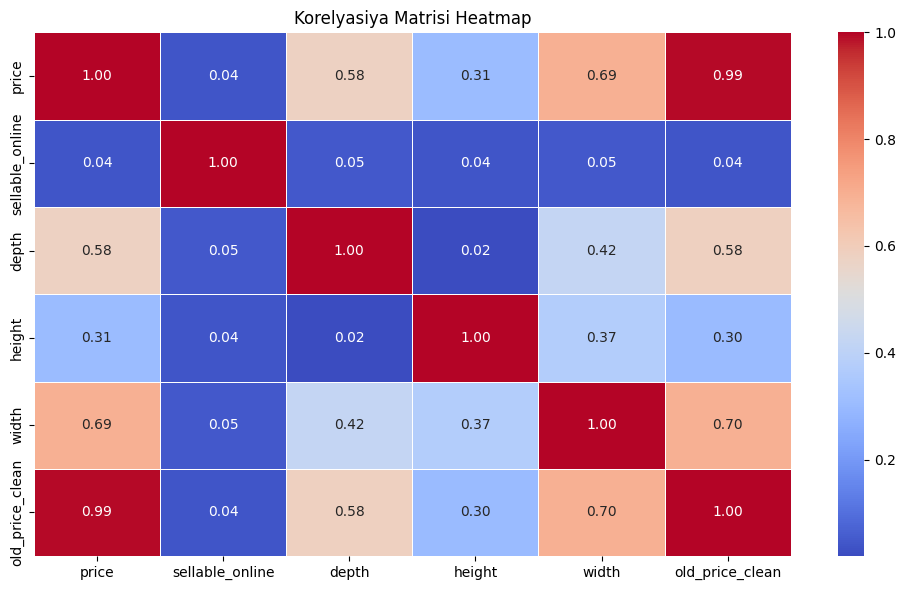

In [ ]:
data_cleaned = data.drop(columns=['item_id'])

correlation_matrix = data_cleaned.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korelyasiya Matrisi Heatmap")
plt.tight_layout()
plt.show()


In [ ]:
data.shape

(3694, 18)

In [ ]:
print(data.isnull().sum())

item_id                0
name                   0
category               0
price                  0
sellable_online        0
link                   0
other_colors           0
short_description      0
designer               0
depth                  0
height                 0
width                  0
product_description    0
current_status         0
keywords               0
topic_group            0
topic_desc             0
old_price_clean        0
dtype: int64


Boolean Conversion: Ensure the sellable_online column is a proper boolean type.

In [ ]:
data['sellable_online'] = data['sellable_online'].astype(bool)

<ipython-input-25-182acfaef937>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sellable_online', data=data, palette='Set2')


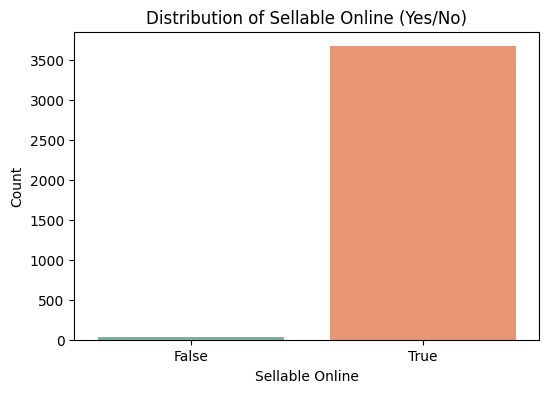

In [ ]:
data['sellable_online'].value_counts()

# Plot the distribution of 'yes' and 'no'
plt.figure(figsize=(6, 4))
sns.countplot(x='sellable_online', data=data, palette='Set2')
plt.title('Distribution of Sellable Online (Yes/No)')
plt.xlabel('Sellable Online')
plt.ylabel('Count')
plt.show()

**Exploratory Data Analysis (EDA) Tasks:**

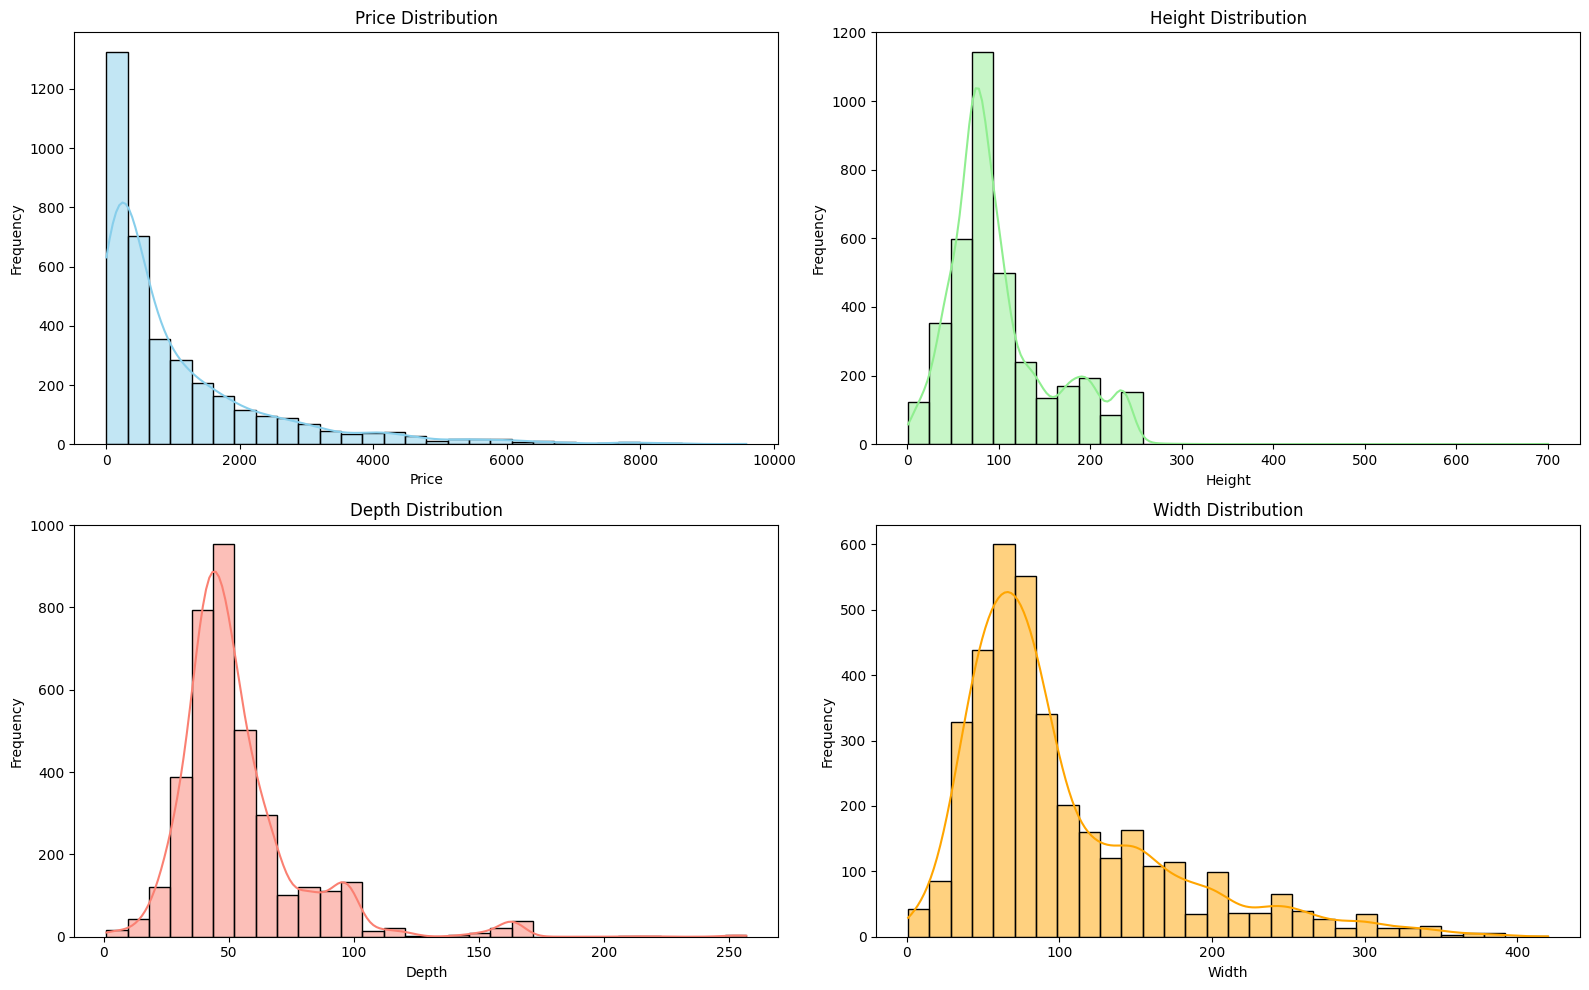

In [ ]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.histplot(data['price'], kde=True, color='skyblue', bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(data['height'], kde=True, color='lightgreen', bins=30)
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(data['depth'], kde=True, color='salmon', bins=30)
plt.title('Depth Distribution')
plt.xlabel('Depth')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.histplot(data['width'], kde=True, color='orange', bins=30)
plt.title('Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


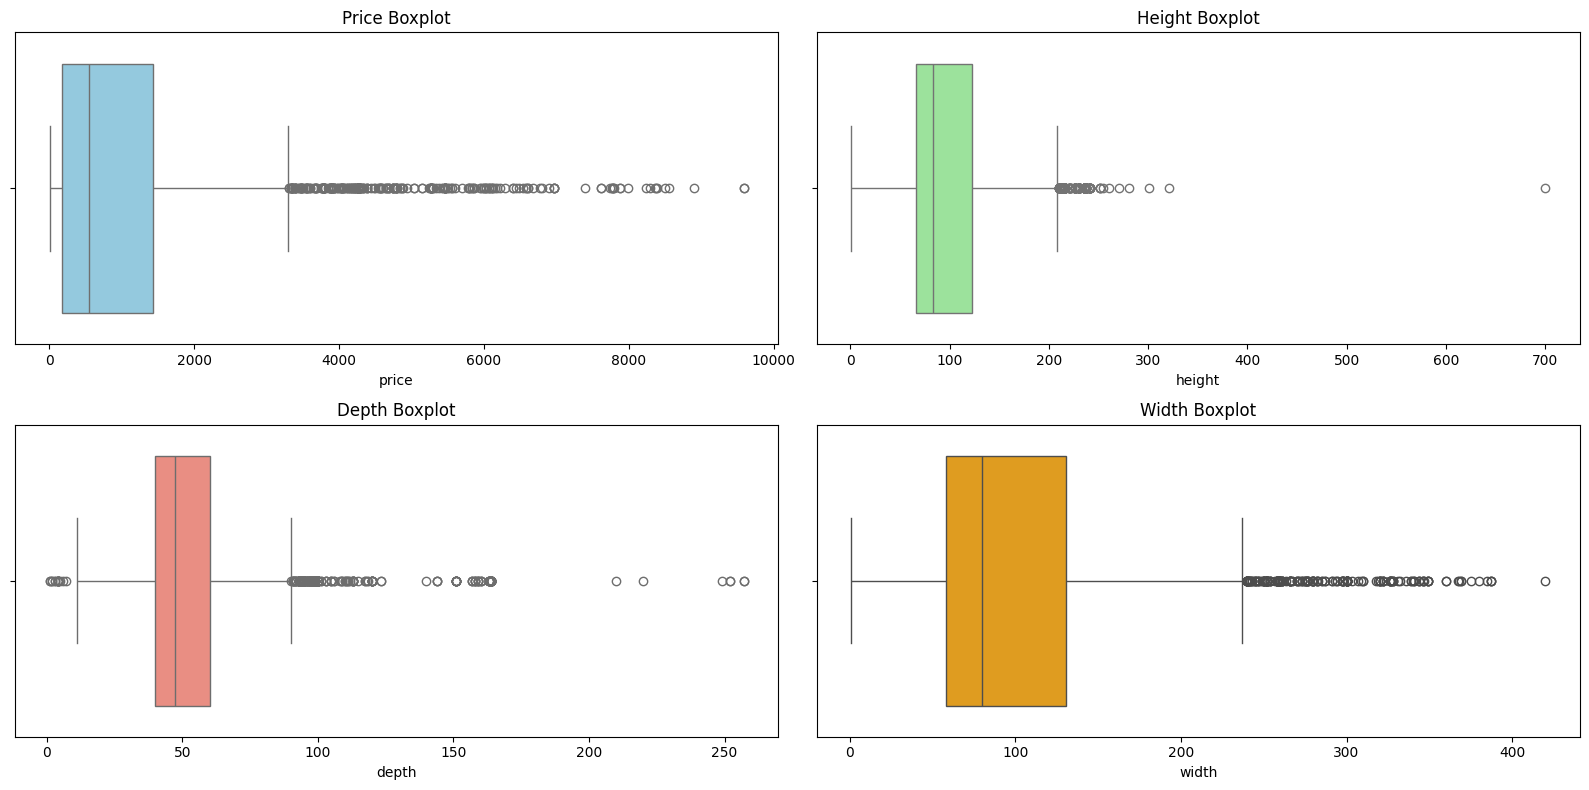

In [ ]:
# Box plots for price, height, depth, and width
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=data['price'], color='skyblue')
plt.title('Price Boxplot')

plt.subplot(2, 2, 2)
sns.boxplot(x=data['height'], color='lightgreen')
plt.title('Height Boxplot')

plt.subplot(2, 2, 3)
sns.boxplot(x=data['depth'], color='salmon')
plt.title('Depth Boxplot')

plt.subplot(2, 2, 4)
sns.boxplot(x=data['width'], color='orange')
plt.title('Width Boxplot')

plt.tight_layout()
plt.show()

Category Insights: Find the most common product categories and their average prices.

In [ ]:
most_common_category = data['category'].value_counts().idxmax()
category_counts = data['category'].value_counts()

print(f"Most common product category: {most_common_category}")
print(f"Count of most common category: {category_counts[most_common_category]}")

print("\nAll category counts:")
print(category_counts)

Most common product category: Tables & desks
Count of most common category: 612

All category counts:
category
Tables & desks                          612
Bookcases & shelving units              548
Chairs                                  481
Sofas & armchairs                       428
Cabinets & cupboards                    292
Wardrobes                               236
Outdoor furniture                       216
Beds                                    208
TV & media furniture                    190
Chests of drawers & drawer units        125
Children's furniture                    124
Nursery furniture                        97
Bar furniture                            47
Trolleys                                 28
Caf√© furniture                          26
Sideboards, buffets & console tables     23
Room dividers                            13
Name: count, dtype: int64



All category counts:
category
Tables & desks                          612
Bookcases & shelving units              548
Chairs                                  481
Sofas & armchairs                       428
Cabinets & cupboards                    292
Wardrobes                               236
Outdoor furniture                       216
Beds                                    208
TV & media furniture                    190
Chests of drawers & drawer units        125
Children's furniture                    124
Nursery furniture                        97
Bar furniture                            47
Trolleys                                 28
Caf√© furniture                          26
Sideboards, buffets & console tables     23
Room dividers                            13
Name: count, dtype: int64


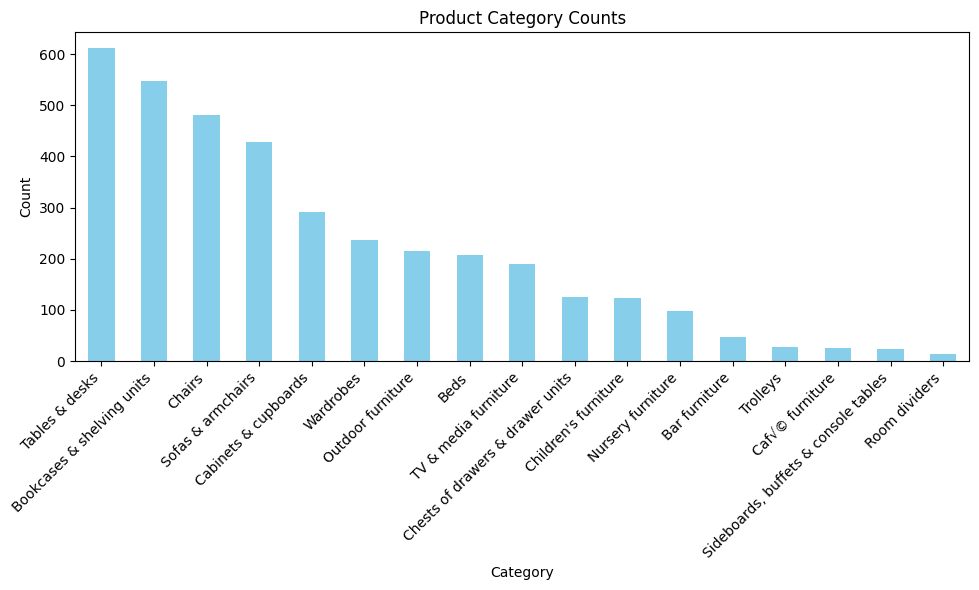

In [ ]:
print("\nAll category counts:")
print(category_counts)

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Product Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
category_avg_price = data.groupby('category')['price'].mean().reset_index()
category_avg_price = category_avg_price.sort_values(by='price', ascending=False)
print("\nAverage Prices per Category:\n", category_avg_price)


Average Prices per Category:
                                 category        price
16                             Wardrobes  2162.141949
12                     Sofas & armchairs  2004.016355
1                                   Beds  1647.432692
14                        Tables & desks  1129.395425
11  Sideboards, buffets & console tables  1068.086957
5                                 Chairs  1048.932640
10                         Room dividers   932.000000
9                      Outdoor furniture   859.826852
3                   Cabinets & cupboards   789.015753
0                          Bar furniture   679.553191
15                              Trolleys   678.517857
13                  TV & media furniture   659.050526
6       Chests of drawers & drawer units   612.180000
4                        Caf√© furniture   553.884615
2             Bookcases & shelving units   519.416058
8                      Nursery furniture   393.659794
7                   Children's furniture   272.7580

Online Availability: Investigate the proportion of products available for online purchase.

In [ ]:
data

,item_id,name,category,price,sellable_online,link,other_colors,short_description,designer,depth,height,width,product_description,current_status,keywords,topic_group,topic_desc,old_price_clean
0,90420332,FREKVENS,Bar furniture,265.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,48.8,99.0,51.0,Item discontinued,Item discontinued,,,,265.0
1,80155205,STIG,Bar furniture,69.0,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,Item discontinued,Item discontinued,,,,69.0
2,50420329,FREKVENS,Bar furniture,177.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,53.0,104.0,43.0,Item discontinued,Item discontinued,,,,295.0
3,400550,EKEDALEN,Bar furniture,345.0,True,https://www.ikea.com/sa/en/p/ekedalen-bar-stoo...,No,"Bar stool with backrest, 75 cm",Ehl√©n Johansson,52.0,114.0,43.0,Item discontinued,Item discontinued,,,,345.0
4,40426138,HENRIKSDAL,Bar furniture,395.0,True,https://www.ikea.com/sa/en/p/henriksdal-bar-st...,No,"Bar stool with backrest frame, ...",Karl Malmvall,51.0,102.0,40.0,Item discontinued,Item discontinued,,,,395.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,19385677,PAX,Wardrobes,2505.0,True,https://www.ikea.com/sa/en/p/pax-wardrobe-comb...,Yes,"Wardrobe combination, 150x58x...",Ehl√©n Johansson/Ola Wihlborg/IKEA of Sweden,58.0,236.0,150.0,Shop for fitted wardrobes online at IKEA Saudi...,Item still available for sale,fitted online stylish,1.0,Style and Functionality,2505.0
3690,39329299,PAX / FORSAND/VIKEDAL,Wardrobes,1260.0,True,https://www.ikea.com/sa/en/p/pax-forsand-viked...,Yes,"Wardrobe combination, 75x60x2...",Ehl√©n Johansson/IKEA of Sweden,60.0,201.0,75.0,Shop for fitted wardrobes online at IKEA Saudi...,Item still available for sale,fitted online stylish,1.0,Style and Functionality,1260.0
3691,79302995,ELVARLI,Wardrobes,1611.0,True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehl√©n Johansson,50.0,109.2,175.0,"ELVARLI wardrobe combination, white, 175x51x22...",Item still available for sale,white 175x51x222-350 Make lovely decorative ad...,2.0,Durability and Appearance,1815.0
3692,99157902,ELVARLI,Wardrobes,750.0,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehl√©n Johansson,50.0,151.6,91.0,"ELVARLI wardrobe combination, white, 92x51x222...",Item still available for sale,white 92x51x222-350 Make lovely decorative adj...,2.0,Durability and Appearance,820.0


In [ ]:
online_products=data[data['sellable_online']==True]
total_products=len(data)

proportion_online=len(online_products)/total_products
print(f"Proportion of products available for online purcharse:{proportion_online:.2f}")

Proportion of products available for online purcharse:0.99


In [ ]:
print(data['sellable_online'].value_counts())

sellable_online
True     3666
False      28
Name: count, dtype: int64


In [ ]:
total_products

3694

In [ ]:
len(online_products)

3666

In [ ]:
(data['sellable_online']==True).sum()

np.int64(3666)

Price Change Analysis: Determine how many products have a recorded change between price and old_price.

In [ ]:
price_changed=data[data['price']!=data['old_price_clean']]
number_changed_products=len(price_changed)

print(f'Number of products with a price change:{number_changed_products}')

Number of products with a price change:654


In [ ]:
equal_prices_count = (data['price'] == data['old_price_clean']).sum()
print(f"Bərabər qiymətə sahib məhsul sayı: {equal_prices_count}")

Bərabər qiymətə sahib məhsul sayı: 3040


In [ ]:
total_products = len(data)
equal_prices_count = (data['price'] == data['old_price_clean']).sum()
equal_prices_ratio = equal_prices_count / total_products

print(f"Bərabər qiymətə sahib məhsulların nisbəti: {equal_prices_ratio:.2%}")

Bərabər qiymətə sahib məhsulların nisbəti: 82.30%


In [ ]:
data.head()

,item_id,name,category,price,sellable_online,link,other_colors,short_description,designer,depth,height,width,product_description,current_status,keywords,topic_group,topic_desc,old_price_clean
0,90420332,FREKVENS,Bar furniture,265.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,48.8,99.0,51.0,Item discontinued,Item discontinued,,,,265.0
1,80155205,STIG,Bar furniture,69.0,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,Item discontinued,Item discontinued,,,,69.0
2,50420329,FREKVENS,Bar furniture,177.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,53.0,104.0,43.0,Item discontinued,Item discontinued,,,,295.0
3,400550,EKEDALEN,Bar furniture,345.0,True,https://www.ikea.com/sa/en/p/ekedalen-bar-stoo...,No,"Bar stool with backrest, 75 cm",Ehl√©n Johansson,52.0,114.0,43.0,Item discontinued,Item discontinued,,,,345.0
4,40426138,HENRIKSDAL,Bar furniture,395.0,True,https://www.ikea.com/sa/en/p/henriksdal-bar-st...,No,"Bar stool with backrest frame, ...",Karl Malmvall,51.0,102.0,40.0,Item discontinued,Item discontinued,,,,395.0


**Feature Engineering Tasks:**

Price Difference Feature: Create a new feature representing the difference

between price and old_price (where applicable).

In [ ]:
data['old_price_clean'] = data.apply(
    lambda row: row['price'] if pd.isna(row['old_price_clean']) else row['old_price_clean'],
    axis=1
)

data['price_difference'] = data['old_price_clean'] - data['price']
print(data[['price', 'old_price_clean', 'price_difference']].head())


   price  old_price_clean  price_difference
0  265.0            265.0               0.0
1   69.0             69.0               0.0
2  177.0            295.0             118.0
3  345.0            345.0               0.0
4  395.0            395.0               0.0


In [ ]:
data['price_difference'].value_counts()

,count
price_difference,
0.0,3040
199.0,17
119.0,16
70.0,13
180.0,12
...,...
161.0,1
280.0,1
51.0,1


**Dimension Ratios: Create features like depth/width or height/depth for deeper analysis**.

In [ ]:
# creating features
data['depth_width_ratio'] = data['depth'] / data['width']
data['height_depth_ratio'] = data['height'] / data['depth']
data['height_width_ratio'] = data['height'] / data['width']

data.replace([np.inf, -np.inf], np.nan, inplace=True)

print(data[['depth', 'width', 'height', 'depth_width_ratio', 'height_depth_ratio', 'height_width_ratio']].head())

   depth  width  height  depth_width_ratio  height_depth_ratio  \
0   48.8   51.0    99.0           0.956863            2.028689   
1   50.0   60.0   100.0           0.833333            2.000000   
2   53.0   43.0   104.0           1.232558            1.962264   
3   52.0   43.0   114.0           1.209302            2.192308   
4   51.0   40.0   102.0           1.275000            2.000000   

   height_width_ratio  
0            1.941176  
1            1.666667  
2            2.418605  
3            2.651163  
4            2.550000  


**Color Availability: Convert the other_colors column into a numerical feature (e.g., one-hot encoding for "Yes"/"No").**

In [ ]:
data['other_colors'].value_counts()

,count
other_colors,
No,2182
Yes,1512


*One Hot Encoding (OHE)*

In [ ]:
color_encoded =pd.get_dummies(data['other_colors'], prefix='color',drop_first=True)
data = pd.concat([data, color_encoded], axis=1)

Keyword Extraction: Process the keywords column to extract useful terms for potential text analysis.

In [ ]:
data['keywords'].isnull().sum()

np.int64(0)

In [ ]:
data['keywords_clean'] = data['keywords'].fillna('').str.lower()

In [ ]:
data['keywords_clean'].isnull().sum()

np.int64(0)

In [ ]:
import re
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

def clean_keywords(text):
    if pd.isnull(text):
        return 'unknown'

    text = text.lower()
    text = re.sub(r'\d+x\d+', '', text)
    text = re.sub(r'\d+-\d+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\bcm\b', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    text = text.replace('etra', 'extra')
    text = text.replace('relaed', 'relaxed')
    text = text.replace('lightening', 'lightning')

    text = re.sub(r'\b(\w+)\1\b', r'\1', text)

    redundant_phrases = ['fold easy stow', 'right need go', 'slatted', 'white', 'black', 'xx', 'x', 'w', 'bed bed']
    for phrase in redundant_phrases:
        text = text.replace(phrase, '')

    words = text.split()
    stop_words = set(stopwords.words('english'))

    custom_stopwords = {'use', 'find', 'many', 'place', 'want', 'good', 'put', 'several', 'get', 'organise', 'top', 'goes', 'made', 'wall', 'foldable', 'mounted', 'xx', 'x'}
    stop_words.update(custom_stopwords)

    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

data = pd.read_excel('cleaned_data.xlsx')

data['cleaned_keywords'] = data['keywords'].apply(lambda x: clean_keywords(x))

data_filtered = data[data['cleaned_keywords'].str.split().str.len() > 1]



In [ ]:
data.columns

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigrams = vectorizer.fit_transform(df_filtered['cleaned_keywords'])

bigram_feature_names = vectorizer.get_feature_names_out()

bigram_counts = bigrams.sum(axis=0).A1
bigram_freq = dict(zip(bigram_feature_names, bigram_counts))

sorted_bigram_freq = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)

print(sorted_bigram_freq[:10])


In [ ]:
bigram_freq = pd.Series(dict(sorted_bigram_freq)).sort_values(ascending=False)
print(bigram_freq.head())

In [ ]:
threshold_value = 20
filtered_bigrams = {bigram: count for bigram, count in sorted_bigram_freq if count >= threshold_value}

print(filtered_bigrams)

In [ ]:
print(f"Filtered bigrams count: {len(filtered_bigrams)}")

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

bigram_freq = {f'{bigram[0]} {bigram[1]}': count for bigram, count in filtered_bigrams.items()}

wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(bigram_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=10)
tfidf_matrix = tfidf.fit_transform(df['cleaned_keywords'])


feature_names = tfidf.get_feature_names_out()
df_tfidf = pd.DataFrame(tfidf_matrix.T.toarray(), index=feature_names)
df_tfidf = df_tfidf.transpose()

print(df_tfidf)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=10)
X = vectorizer.fit_transform(df['cleaned_keywords'])

bigrams = vectorizer.get_feature_names_out()
print(bigrams)


In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

custom_stopwords = {'buy', 'cheap', 'sale', 'discount', 'product'}
stop_words.update(custom_stopwords)

print(stop_words)

In [ ]:
keyword_counts = df['cleaned_keywords'].str.split().explode().value_counts()
top_keywords = keyword_counts.head(20)

top_keywords.plot(kind='bar', figsize=(10, 5))
plt.title('Ən Yüksək Əhəmiyyətli Açar Sözlər')
plt.xlabel('Açar Sözlər')
plt.ylabel('Əhəmiyyət seviyyesi')
plt.show()


In [ ]:
df['depth'] = df['depth'].fillna(df['depth'].mean())
df['height'] = df['height'].fillna(df['height'].mean())
df['width'] = df['width'].fillna(df['width'].mean())

In [ ]:
df.isnull().sum()

**Text Features: Use NLP techniques to vectorize short_description and product_description for input into models.**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')

df['combined_description'] = df['short_description'] + " " + df['product_description']

X_bow = vectorizer.fit_transform(df['combined_description'])

print(X_bow.toarray())

In [ ]:
print(X_bow.nnz)  # Non-zero elements count
print(X_bow.shape)  # Matrix dimensions (rows, columns)

In [ ]:
dense_matrix = X_bow.toarray()
print(dense_matrix)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(X_bow.toarray())
plt.scatter(reduced[:, 0], reduced[:, 1])
plt.title('PCA of the Bag of Words Matrix')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import re

measurement_units = {'cm', 'm', 'kg', 'g', 'mm', 'inch', 'ft', 'lbs', 'cm²', 'm²', 'km'}

vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(df['short_description'])

term_frequencies = X.sum(axis=0).A1

terms = vectorizer.get_feature_names_out()
term_frequency_dict = dict(zip(terms, term_frequencies))

term_frequency_dict = {term: freq for term, freq in term_frequency_dict.items() if not re.search(r'\d', term) and term not in measurement_units}

wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(term_frequency_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(df['short_description'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)


lda.fit(X)

terms = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic #{idx}:")
    print(" ".join([terms[i] for i in topic.argsort()[:-11:-1]]))


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X.toarray())


plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', alpha=0.5)
plt.title("PCA of Product Descriptions")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df['short_description'], df['category'], test_size=0.3, random_state=42)


vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

y_pred = classifier.predict(X_test_vec)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


In [ ]:
df

Label Encoding: Encode categorical columns like category and designer for model input.

**Model Building and Evaluation:**

XGBOOST model

In [ ]:
pip install xgboost

Feature Importance

**Advanced Insights and Visualization:**

Price Trends: